In [7]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def analyze(experiments):
    results = []
    accs = []
    for experiment in experiments:
        test_filepath = os.path.join("outputs", experiment, f"{experiment}_metrics_test_epoch.csv")
        test_df = pd.read_csv(test_filepath)
        test_df = test_df.groupby(["Unnamed: 0"]).agg({
            "Loss": "first", 
            "Total": "first", 
            "Correct": "first", 
            "Acc@1": "first",
            "InferenceTime": "max", 
        })
        accs.append(test_df["Acc@1"])
        best_ind = np.argmax(test_df["Acc@1"]).item()

        train_filepath = os.path.join("outputs", experiment, f"{experiment}_metrics_train_epoch.csv")
        train_df = pd.read_csv(train_filepath)
        train_df = train_df.groupby(["epoch_num"]).agg({
            "Loss": "mean", 
            "Total": "sum", 
            "Correct": "sum", 
            "Acc@1": "mean", 
            "TrainingTime": "max", 
        })

        results.append({
            "Experiment": experiment, 
            "Acc@1": test_df.loc[best_ind, "Acc@1"].item(), 
            "Loss": test_df.loc[best_ind, "Loss"].item(), 
            "InferenceTime": np.mean(test_df["InferenceTime"]), #test_df.loc[best_ind, "InferenceTime"].item(), 
            "TrainingTime": np.mean(train_df["TrainingTime"]), #train_df.loc[best_ind, "TrainingTime"].item(), 
        })
    results_df = pd.DataFrame(results)
    return accs, results_df

,Experiment,Acc@1,Loss,InferenceTime,TrainingTime
0,vit_no_rope_cifar10,0.5704,1.292958,0.698048,4.266704
1,vit_rope_1D_axial_2x2_cifar10,0.6417,1.178029,26.513650,33.719424
2,vit_rope_2D_axial_2x2_cifar10,0.7036,1.045355,27.590983,36.243006
3,vit_rope_2D_axial_3x3_2_cifar10,0.6910,1.019581,30.304017,40.396781
4,vit_rope_2D_axial_4x4_0_cifar10,0.6790,1.076951,27.195362,36.091101
5,vit_rope_2D_axial_5x5_0_cifar10,0.6487,1.155463,32.150683,42.616316
6,vit_rope_2D_axial_6x6_0_cifar10,0.6630,1.173818,30.788282,40.572453
7,vit_weighted_rope_2D_axial_3x3_cifar10,0.6093,1.186074,43.836843,58.146929
8,vit_weighted_rope_2D_axial_4x4_cifar10,0.6087,1.201313,51.665537,124.239747


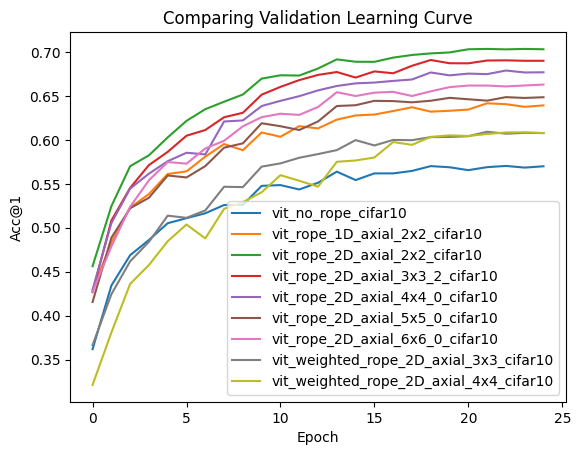

In [9]:
key_experiments = [
    "vit_no_rope_cifar10", 
    "vit_rope_1D_axial_2x2_cifar10", 
    "vit_rope_2D_axial_2x2_cifar10", 
    "vit_rope_2D_axial_3x3_2_cifar10", 
    "vit_rope_2D_axial_4x4_0_cifar10", 
    "vit_rope_2D_axial_5x5_0_cifar10", 
    "vit_rope_2D_axial_6x6_0_cifar10", 
    "vit_weighted_rope_2D_axial_3x3_cifar10", 
    "vit_weighted_rope_2D_axial_4x4_cifar10", 
]

accs, results_df = analyze(key_experiments)
display(results_df)

x = list(range(25))
for experiment, y in zip(key_experiments, accs): 
    plt.plot(x, y, label=experiment)

plt.title("Comparing Validation Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc@1")
plt.legend()
plt.show()

,Experiment,Acc@1,Loss,InferenceTime,TrainingTime
0,vit_no_rope_cifar10,0.5704,1.292958,0.698048,4.266704
1,vit_rope_1D_axial_2x2_cifar10,0.6417,1.178029,26.513650,33.719424
2,vit_rope_2D_axial_2x2_cifar10,0.7036,1.045355,27.590983,36.243006
3,vit_rope_2D_axial_3x3_0_cifar10,0.6901,1.069833,31.167619,41.111085
4,vit_rope_2D_axial_3x3_1_cifar10,0.6768,1.123753,30.139648,40.132136
5,vit_rope_2D_axial_3x3_2_cifar10,0.6910,1.019581,30.304017,40.396781


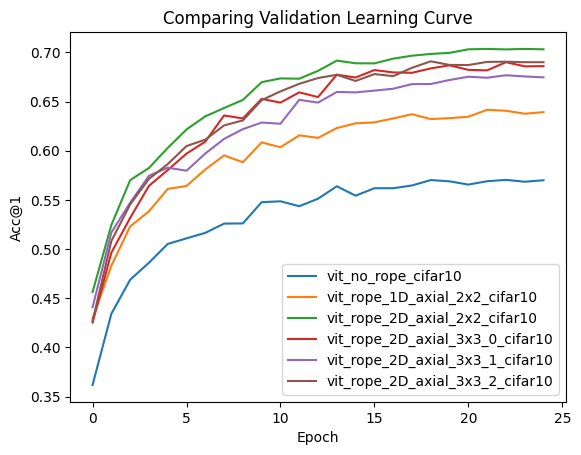

In [10]:
experiments_3x3 = [
    "vit_no_rope_cifar10", 
    "vit_rope_1D_axial_2x2_cifar10", 
    "vit_rope_2D_axial_2x2_cifar10", 
    "vit_rope_2D_axial_3x3_0_cifar10", 
    "vit_rope_2D_axial_3x3_1_cifar10", 
    "vit_rope_2D_axial_3x3_2_cifar10", 
]

accs, results_df = analyze(experiments_3x3)
display(results_df)

x = list(range(25))
for experiment, y in zip(experiments_3x3, accs): 
    plt.plot(x, y, label=experiment)

plt.title("Comparing Validation Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc@1")
plt.legend()
plt.show()